In [10]:
import sys
sys.path.insert(0, '../..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1

In [20]:
# Versuche, die erste Sheet aus einer .ods Datei im Workspace einzulesen
import glob
import os
import pandas as pd
from IPython.display import display
import numpy as np

# Suche rekursiv nach .ods Dateien im Workspace-Ordner
ods_files = glob.glob('/workspaces/EWT/**/*.ods', recursive=True)
if len(ods_files) == 0:
    ods_files = glob.glob('**/*.ods', recursive=True)

if len(ods_files) == 0:
    print('Keine .ods Datei im Workspace gefunden. Lege bitte die Datei `EWT4.ods` in das Projekt oder passe den Pfad an.')
    df_ods = None
else:
    ods_path = ods_files[0]
    print(f'Gefundene .ods Datei: {ods_path} — versuche, erstes Sheet einzulesen...')
    df_ods = None
    # 1) Versuch: pandas mit odf engine
    try:
        df_ods = pd.read_excel(ods_path, engine='odf', sheet_name=0, skiprows=36)
        print('Gelesen mit pandas (engine=odf).')
    except Exception as e:
        print('pandas.read_excel(engine="odf") failed:', e)
        print('Stelle sicher, dass das Paket `odfpy` installiert ist (`pip install odfpy`).')
        # 2) Fallback: pyexcel_ods3
        try:
            import pyexcel_ods3
            data = pyexcel_ods3.get_data(ods_path)
            first_sheet = list(data.keys())[0]
            df_ods = pd.DataFrame(data[first_sheet])
            print('Gelesen mit pyexcel_ods3 (Fallback).')
        except Exception as e2:
            print('Fallback mit pyexcel_ods3 ebenfalls fehlgeschlagen:', e2)
            df_ods = None

if df_ods is not None:
    print('\nEingelesenes DataFrame:')
    print('  shape =', df_ods.shape)
    display(df_ods.head())
else:
    print('\nKein DataFrame eingelesen. Installiere `odfpy` oder `pyexcel_ods3` und versuche es erneut, oder gib mir den Pfad zur Datei.')
    print('Install: pip install odfpy  # oder pip install pyexcel-ods3')
print(ods_files)


Gefundene .ods Datei: /workspaces/EWT/1mM Lactat 2. Messung.ods — versuche, erstes Sheet einzulesen...
Gelesen mit pandas (engine=odf).

Eingelesenes DataFrame:
  shape = (16, 122)


,Zyklus Nr.,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,Zeit [s],0,4,8,12,16,20,24,28,32,...,444,448,452,456,460,464,468,472,476,480
1,Temp. [°C],--,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
2,B1,15843,16121,15994,15915,16005,15949,15839,15880,15829,...,15994,16017,15844,15743,15720,15791,15715,15737,15664,15561
3,B2,43230,43479,42759,42159,42094,41388,41435,41316,41257,...,26779,26732,26471,26164,26142,25936,25815,25733,25628,25277
4,B3,22949,22902,22420,22091,21946,21462,21452,21425,21157,...,16292,16254,16109,15930,15917,15937,15959,15967,15979,15769


['/workspaces/EWT/1mM Lactat 2. Messung.ods', '/workspaces/EWT/EWT4/DATA/MCT1_Influx verschiedene_ ilaccos.ods', '/workspaces/EWT/EWT4/DATA/ETW4.ods', '/workspaces/EWT/EWT2/data/1 mM Lactat_1_20 Verdünnung_1. Messung.ods', '/workspaces/EWT/EWT2/data/1 mM Lactat_1_20 Verdünnung_3. Messung.ods', '/workspaces/EWT/EWT2/data/1 mM Lactat_1_20 Verdünnung_2. Messung.ods']


In [36]:
def Influx_data(df1, x, y, z, w):
    """
    Erstellt einen DataFrame mit Mittelwerten und Standardabweichungen
    aus einem CSV-DataFrame und vier Zeilenindizes.
    
    Parameter:
    - df1: Eingabe-DataFrame (aus CSV)
    - x, y, z, w: Zeilenindizes für Zeit und die drei Messungen
    
    Rückgabe:
    - DataFrame mit Spalten: Time, 1.Messung, 2.Messung, 3.Messung, 
      Mittelwerte, Standardabweichung
    """
    df1 = df1.replace('OVER', np.nan)
    mM_10 = pd.DataFrame()
    mM_1= pd.DataFrame()
    mM_0_1 = pd.DataFrame()
    results = pd.DataFrame()
    results["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    
    #10mM    
    mM_10["1.Messung"] = df_d0(to_float_array(np.array(df1.iloc[y])[1:]))
    mM_10["2.Messung"] = df_d0(to_float_array(np.array(df1.iloc[z])[1:]))
    mM_10["3.Messung"] = df_d0(to_float_array(np.array(df1.iloc[w])[1:]))
    
    # Berechne Mittelwert über die ersten drei Messung-Spalten
    mittelwerte1 = mM_10[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    results["10 mM Mittelwerte"] = mittelwerte1
    
    # Berechne Standardabweichung
    standardabweichung1 = mM_10[["1.Messung", "2.Messung", "3.Messung"]].std(axis=1).tolist()
    results["10 mM Standardabweichung"] = standardabweichung1
    
    #1mM
       
    mM_1["1.Messung"] = df_d0(to_float_array(np.array(df1.iloc[y+3])[1:]))
    mM_1["2.Messung"] = df_d0(to_float_array(np.array(df1.iloc[z+3])[1:]))
    mM_1["3.Messung"] = df_d0(to_float_array(np.array(df1.iloc[w+3])[1:]))
    
    # Berechne Mittelwert über die ersten drei Messung-Spalten
    mittelwerte2 = mM_1[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    results["1 mM Mittelwerte"] = mittelwerte2
    
    # Berechne Standardabweichung
    standardabweichung2 = mM_1[["1.Messung", "2.Messung", "3.Messung"]].std(axis=1).tolist()
    results["1 mM Standardabweichung"] = standardabweichung2
    
    #0,1 mM
    #10mM    
    mM_0_1["1.Messung"] = df_d0(to_float_array(np.array(df1.iloc[y+6])[1:]))
    mM_0_1["2.Messung"] = df_d0(to_float_array(np.array(df1.iloc[z+6])[1:]))
    mM_0_1["3.Messung"] = df_d0(to_float_array(np.array(df1.iloc[w+6])[1:]))
    
    # Berechne Mittelwert über die ersten drei Messung-Spalten
    mittelwerte3 = mM_0_1[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    results["0,1 mM Mittelwerte"] = mittelwerte3
    
    # Berechne Standardabweichung
    standardabweichung3 = mM_0_1[["1.Messung", "2.Messung", "3.Messung"]].std(axis=1).tolist()
    results["0,1 mM Standardabweichung"] = standardabweichung3
    
    return results

In [38]:
# Korrigierter Pfad: Datei heißt offenbar 'ETW4.ods' (nicht 'EWT4.ods')
data_path = '/workspaces/EWT/EWT4/DATA/ETW4.ods'
df_I_MCT1_ilacco1_0 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet3", skiprows=36)
df_I_MCT1_ilacco1_0_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet4", skiprows=36)
df_I_MCT1_ilacco1_1 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet5", skiprows=36)
df_I_MCT1_ilacco1_2 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet6", skiprows=36)

In [39]:
I_MCT1_ilacco1_0 = Influx_data(df_I_MCT1_ilacco1_0,3,5,6,7)
I_MCT1_ilacco1_0_50μM_CCCP = Influx_data(df_I_MCT1_ilacco1_0_50μM_CCCP,3,5,6,7)
I_MCT1_ilacco1_1 = Influx_data(df_I_MCT1_ilacco1_1,3,5,6,7)
I_MCT1_ilacco1_2 = Influx_data(df_I_MCT1_ilacco1_2,3,5,6,7)

In [ ]:
# Erstelle eine 2x2 Figure mit den vier DataFrames als Subplots (Mittelwerte ± Std)
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

frames = [
    ('I_MCT1_ilacco1_0', globals().get('I_MCT1_ilacco1_0', None)),
    ('I_MCT1_ilacco1_0_50μM_CCCP', globals().get('I_MCT1_ilacco1_0_50μM_CCCP', None)),
    ('I_MCT1_ilacco1_1', globals().get('I_MCT1_ilacco1_1', None)),
    ('I_MCT1_ilacco1_2', globals().get('I_MCT1_ilacco1_2', None)),
]

concs = ['10 mM', '1 mM', '0.1 mM']

mean_patterns = {
    '10 mM': ['10 mM mean', '10 mM Mittelwerte', '10 mM Mittelwerte', '10mM mean'],
    '1 mM':  ['1 mM mean', '1 mM Mittelwerte', '1mM mean'],
    '0.1 mM': ['0.1 mM mean', '0,1 mM Mittelwerte', '0.1 mM Mittelwerte']
}
std_patterns = {
    '10 mM': ['10 mM std', '10 mM Standardabweichung'],
    '1 mM':  ['1 mM std', '1 mM Standardabweichung'],
    '0.1 mM': ['0.1 mM std', '0,1 mM Standardabweichung']
}

def find_column(df, patterns):
    if df is None:
        return None
    for p in patterns:
        if p in df.columns:
            return p
    # Fallback: suche nach Spalte, die das Konzentrations-Token und 'mean'/'mittel' enthält
    for col in df.columns:
        low = col.lower()
        for p in patterns:
            token = p.split()[0].lower().replace(',', '.')
            if token in low and ('mean' in low or 'mittel' in low):
                return col
    return None

os.makedirs(os.path.join('..', 'figueres'), exist_ok=True)

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False, sharey=False)
axes = axes.flatten()

for (name, df), ax in zip(frames, axes):
    ax.clear()
    if df is None:
        ax.text(0.5, 0.5, f"{name} not found", ha='center', va='center')
        ax.set_title(name)
        continue

    # Time column
    time_col = None
    for candidate in ['Time', 'time', 'Zeit', 'Zeit [s]']:
        if candidate in df.columns:
            time_col = candidate
            break
    if time_col is None:
        time_col = df.columns[0]

    plotted_any = False
    for conc in concs:
        mean_col = find_column(df, mean_patterns.get(conc, []))
        std_col = find_column(df, std_patterns.get(conc, []))

        # Zusätzliche heuristische Suche
        if mean_col is None:
            for col in df.columns:
                low = col.lower()
                if conc.split()[0] in low and ('mittel' in low or 'mean' in low):
                    mean_col = col
                    break
        if std_col is None:
            for col in df.columns:
                low = col.lower()
                if conc.split()[0] in low and ('std' in low or 'standard' in low or 'abweich' in low):
                    std_col = col
                    break

        if mean_col is None:
            # überspringe diese Konzentration wenn keine Mean-Spalte
            continue

        times = pd.to_numeric(df[time_col], errors='coerce')
        means = pd.to_numeric(df[mean_col], errors='coerce')
        stds = np.zeros_like(means)
        if std_col is not None:
            stds = pd.to_numeric(df[std_col], errors='coerce')

        mask = (~times.isna()) & (~means.isna())
        if mask.sum() == 0:
            continue

        ax.errorbar(times[mask], means[mask], yerr=stds[mask], fmt='o-', label=conc, capsize=4)
        plotted_any = True

    if not plotted_any:
        ax.text(0.5, 0.5, f"No valid data in {name}", ha='center', va='center')

    ax.set_title(name)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\\Delta F/F_0$')
    ax.grid(alpha=0.3)
    ax.legend()

plt.tight_layout()
outpath = os.path.join('..', 'figueres', 'I_MCT1_all_subplots.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved combined subplot: {outpath}')
plt.show()

Saved plot: ../figueres/I_MCT1_ilacco1_0_10-1-0p1m_plot.png


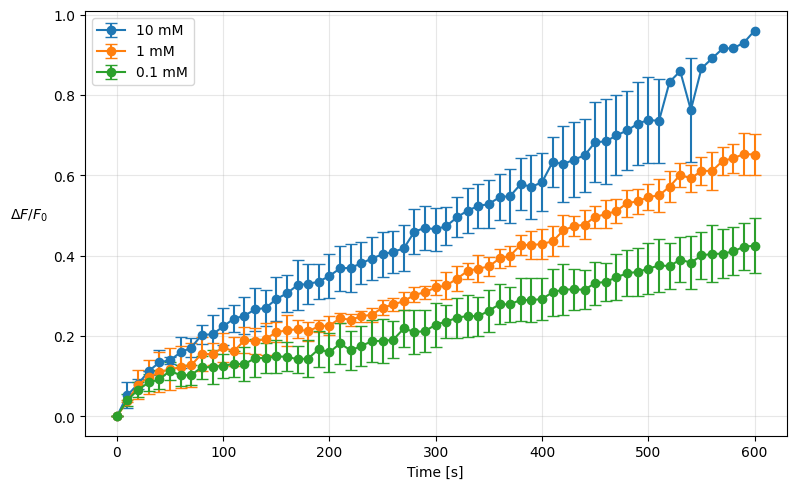

Saved plot: ../figueres/I_MCT1_ilacco1_0_50μM_CCCP_10-1-0p1m_plot.png


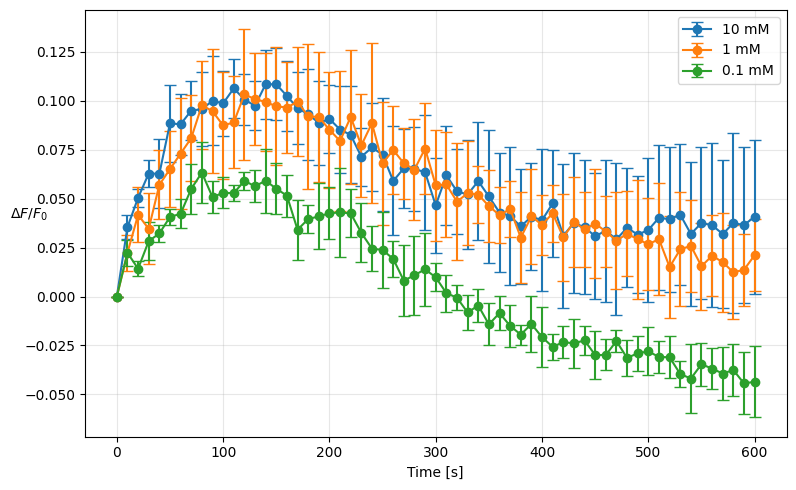

Saved plot: ../figueres/I_MCT1_ilacco1_1_10-1-0p1m_plot.png


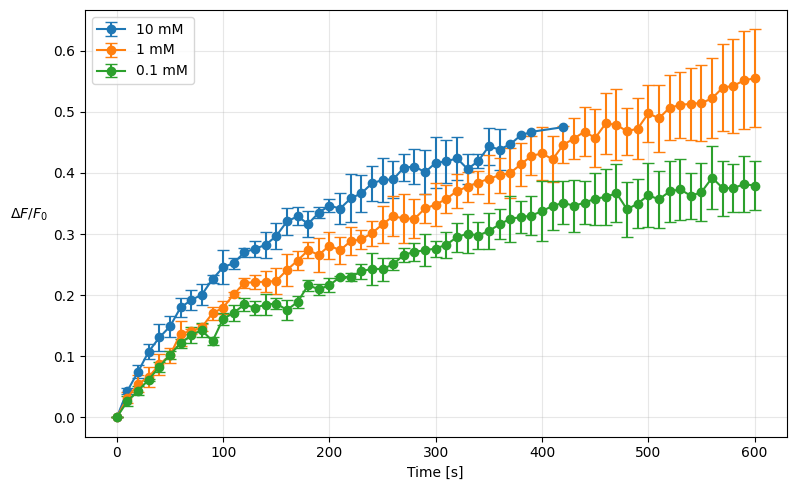

Saved plot: ../figueres/I_MCT1_ilacco1_2_10-1-0p1m_plot.png


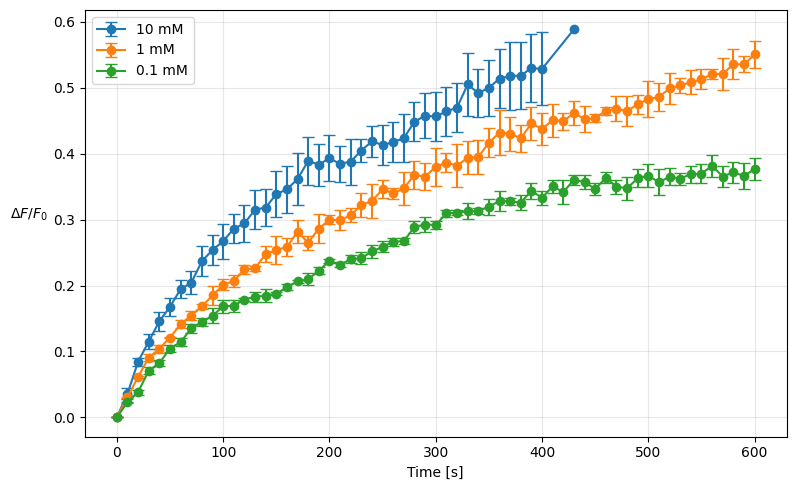

In [42]:
# Erzeuge Plots für die DataFrames, die in der vorherigen Zelle erzeugt wurden.
# Für jeden DataFrame wird ein Plot erstellt, der 10 mM, 1 mM und 0.1 mM (Mittelwerte)
# gegen Time darstellt und die jeweilige Standardabweichung als Fehlerbalken zeigt.

import os
import matplotlib.pyplot as plt

frames = [
    ('I_MCT1_ilacco1_0', globals().get('I_MCT1_ilacco1_0', None)),
    ('I_MCT1_ilacco1_0_50μM_CCCP', globals().get('I_MCT1_ilacco1_0_50μM_CCCP', None)),
    ('I_MCT1_ilacco1_1', globals().get('I_MCT1_ilacco1_1', None)),
    ('I_MCT1_ilacco1_2', globals().get('I_MCT1_ilacco1_2', None)),
]

concs = ['10 mM', '1 mM', '0.1 mM']

# Mappings für mögliche Spaltenname-Varianten
mean_patterns = {
    '10 mM': ['10 mM mean', '10 mM Mittelwerte', '10 mM Mittelwerte', '10 mM Mittelwerte', '10 mM Mittelwerte', '10 mM Mittelwerte', '10,0 mM Mittelwerte', '10mM mean'],
    '1 mM':  ['1 mM mean', '1 mM Mittelwerte', '1 mM Mittelwerte', '1mM mean'],
    '0.1 mM': ['0.1 mM mean', '0,1 mM Mittelwerte', '0,1 mM Mittelwerte', '0.1 mM Mittelwerte', '0,1 mM mean']
}
std_patterns = {
    '10 mM': ['10 mM std', '10 mM Standardabweichung', '10 mM Standardabweichung'],
    '1 mM':  ['1 mM std', '1 mM Standardabweichung', '1 mM Standardabweichung'],
    '0.1 mM': ['0.1 mM std', '0,1 mM Standardabweichung', '0.1 mM Standardabweichung']
}

os.makedirs(os.path.join('..', 'figueres'), exist_ok=True)

def find_column(df, patterns):
    if df is None:
        return None
    for p in patterns:
        if p in df.columns:
            return p
    # Fallback: suche nach Spalte, die token enthält
    for col in df.columns:
        low = col.lower()
        for p in patterns:
            if p.split()[0].lower().replace(',', '.') in low and ('mean' in p.lower() or 'mittel' in p.lower() or 'std' in p.lower() or 'standard' in p.lower()):
                return col
    return None

for name, df in frames:
    if df is None:
        print(f"Variable {name} nicht gefunden — überspringe.")
        continue
    # Versuche Time-Spalte
    time_col = None
    for candidate in ['Time', 'time', 'Zeit', 'Zeit [s]']:
        if candidate in df.columns:
            time_col = candidate
            break
    if time_col is None:
        # eventuell erste Spalte
        time_col = df.columns[0]

    plt.figure(figsize=(8,5))
    plotted_any = False

    for conc in concs:
        mean_col = find_column(df, mean_patterns.get(conc, []))
        std_col = find_column(df, std_patterns.get(conc, []))

        # Zusätzliche Versuche: deutsche Namensschema
        if mean_col is None:
            # suche nach Spalten, die die Konzentration und 'mittel'/'mittelwerte' enthalten
            for col in df.columns:
                low = col.lower()
                if conc.split()[0] in low and ('mittel' in low or 'mean' in low):
                    mean_col = col
                    break
        if std_col is None:
            for col in df.columns:
                low = col.lower()
                if conc.split()[0] in low and ('std' in low or 'standard' in low or 'abweich' in low):
                    std_col = col
                    break

        if mean_col is None:
            print(f"Für {name}: Mean-Spalte für {conc} nicht gefunden — überspringe {conc}.")
            continue

        times = pd.to_numeric(df[time_col], errors='coerce')
        means = pd.to_numeric(df[mean_col], errors='coerce')
        if std_col is not None:
            stds = pd.to_numeric(df[std_col], errors='coerce')
        else:
            stds = np.zeros_like(means)

        mask = (~times.isna()) & (~means.isna())
        if mask.sum() == 0:
            print(f"Für {name}/{conc}: Keine gültigen Datenpunkte.")
            continue

        plt.errorbar(times[mask], means[mask], yerr=stds[mask], fmt='o-', label=conc, capsize=4)
        plotted_any = True

    if not plotted_any:
        print(f"Keine Daten zum Plotten in {name} gefunden.")
        plt.close()
        continue

    plt.xlabel('Time [s]')
    plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=12)
    ax = plt.gca()
    ax.yaxis.set_label_coords(-0.08, 0.5)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()

    outpath = os.path.join('..', 'figueres', f'{name}_10-1-0p1m_plot.png')
    plt.savefig(outpath, dpi=300, bbox_inches='tight')
    print(f'Saved plot: {outpath}')
    plt.show()
